<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Notebook</p></tp>
            <tp><p style="font-size:150%;text-align:center">Arquitecturas de agentes</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---


## Objetivo <a class="anchor" id="inicio"></a>

En este notebook ejemplificaremos los dos tipos más sencillos de agente: dirigido por tabla y de respuesta simple. Usaremos el problema del laberinto para implementar los programa de agente para intentar salir del laberinto.


## Secciones

Desarrollaremos la explicación en las siguientes secciones:

1. [El ambiente del laberinto](#lab)
2. [Un agente dirigido por tabla](#agenteTD)
3. [Un agente de reflejo simple](#agenteSR)
4. [Pruebas de desempeño](#pruebas)

## El ambiente del laberinto <a class="anchor" id="lab"></a>

([Volver al inicio](#inicio))

En el problema del laberinto la percepción del agente está basada en una colección de sensores que se encienden cuando detectan un obstáculo, organizados de la siguiente manera:

`[sensor frontal, sensor izquierdo, sensor derecho, sensor trasero]`

Los valores de los sensores se obtienen mediante el método `para_sentidos()` de la clase `Laberinto` y se almacenan en el atributo `perceptos` de un objeto de clase `Agente`. Veamos la implementación de la percepción del agente directamente en el ejemplo donde el agente comienza en la casilla $(11,11)$:

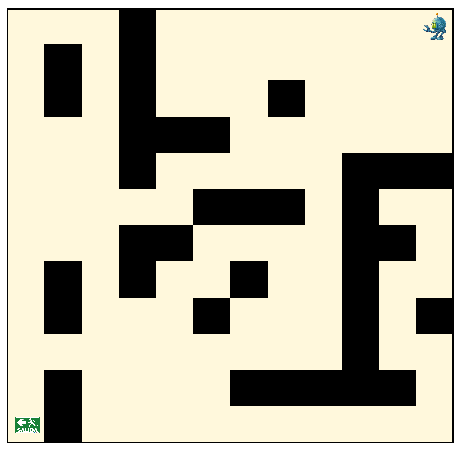

La lista de sensores es:
[sensor frontal, sensor izquierdo, sensor derecho, sensor trasero]
Los valores en la casilla (11,11) son:
[False, False, True, True]


In [1]:
from agentes import *
lab = Laberinto(pos_inicial=(11,11))
lab.pintar()
agente = Agente()
agente.perceptos = lab.para_sentidos()
print('La lista de sensores es:')
print('[sensor frontal, sensor izquierdo, sensor derecho, sensor trasero]')
print('Los valores en la casilla (11,11) son:')
print(agente.perceptos)

Las acciones posibles del agente son:

* adelante: el agente avanza una casilla.
* voltearIzquierda: el agente gira 90º en contra de las manecillas del reloj.
* voltearDerecha: el agente gira 90º a favor de las manecillas del reloj.

Cada acción del agente tiene un efecto en el entorno, implementado mediante el método `transicion()` de la clase `Laberinto`. Veamos un ejemplo en donde el agente parte de la casilla $(11,11)$ y deambula un poco por el laberinto:

In [ ]:
from agentes import *
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt

lab = Laberinto(pos_inicial=(11,11))
acciones = ['adelante', 'adelante', 'voltearIzquierda', 
            'adelante', 'adelante', 'adelante', 'voltearDerecha', 'adelante']

lab.pintar()

for a in acciones:
    lab.transicion(a)
    clear_output(wait=True)
    lab.pintar()
    plt.show()
    sleep(.25)    

**Ejercicio 1:**

Deambule aleatoriamente por diez pasos y presente en cada una de ellas lo que perciben los sensores del agente.

**Respuesta:**

Una implementación es la siguiente:

In [ ]:
from agentes import *
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from random import choice

lab = Laberinto(pos_inicial=(11,11))
direcciones = ['voltearIzquierda', 'voltearDerecha']

lab.pintar()

for _ in range(10):
    direccion = choice(direcciones)
    lab.transicion(direccion)
    lab.transicion('adelante')   
    agente.perceptos = lab.para_sentidos()
    clear_output(wait=True)
    print('Los perceptos son:')
    print(agente.perceptos)
    lab.pintar()
    plt.show()
    sleep(.5)    

---

## Un agente dirigido por tabla <a class="anchor" id="agenteTD"></a>

([Volver al inicio](#inicio))

El tipo más sencillo de un programa de agente es cuando hacemos una asociación directa entre input y output, en este caso, entre percepción y acción. Esta asociación se puede realizar mediante una tabla. 

Definimos la siguiente tabla (que hasta ahora sólo está definida parcialmente), la cual vincula perceptos con acciones. La tabla implementa la idea de que si el agente percibe que el frente no está bloqueado y el flanco derecho está bloqueado, entonces avanza una casilla:

In [ ]:
# (sensor frontal, sensor izquierdo, sensor derecho, sensor trasero)
tabla = {
    # Si el frente no está bloqueado y el flanco derecho está
    # bloqueado, avanzar una casilla
    (False, True, True, True):['adelante'],
    (False, True, True, False):['adelante'],
    (False, False, True, True):['adelante'],
    (False, False, True, False):['adelante'],
}

Observe que esta regla tan simple requiere ser expresada mediante cuatro filas de la tabla.


Ahora incluimos el programa dirigido por tabla como el método `programa()` de la clase `Agente`:

In [ ]:
def programaTD(self):
    self.acciones += self.tabla[tuple(self.perceptos)]

setattr(Agente, 'programa', programaTD)

Observemos cómo trabaja el agente que implementa este programa:

In [ ]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

lab = Laberinto(pos_inicial=(11,11))
agente = Agente()
agente.tabla = tabla

for i in range(20):
    agente.perceptos = lab.para_sentidos()
    a = agente.reaccionar() # <= ver definición en agentes.py
    lab.transicion(a)
    clear_output(wait=True)
    lab.pintar()
    plt.show()
    sleep(.25)   

El error `KeyError: (True, False, True, False)` ocurre porque la tabla no tiene ninguna fila para el percepto `(True, False, True, False)` y entonces no puede determinar ninguna acción a tomar. ¡Observe que el agente no sabe qué acción tomar en ninguna situación cuando hay un muro enfrente! 

**Ejercicio 2:**

El agente llega hasta que se topa con un muro y no sabe qué hacer. Extienda la tabla anterior para incluir las líneas que determinan que "si el frente y el flanco derecho están bloqueados y el flanco izquierdo no está bloqueado, voltear a la izquierda".

Visualice el funcionamiento del agente para comprobar su respuesta.

**Respuesta:**

La implementación es la siguiente:

In [ ]:
# (sensor frontal, sensor izquierdo, sensor derecho, sensor trasero)
tabla = {
    # Si el frente no está bloqueado y el flanco derecho está
    # bloqueado, avanzar una casilla
    (False, True, True, True):['adelante'],
    (False, True, True, False):['adelante'],
    (False, False, True, True):['adelante'],
    (False, False, True, False):['adelante'],
    # Si el frente y el flanco derecho están bloqueados y 
    # el flanco izquierdo no está bloqueado, voltear a la izquierda
    (True, False, True, True):['voltearIzquierda'],
    (True, False, True, False):['voltearIzquierda'],
}

In [ ]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

lab = Laberinto(pos_inicial=(11,11))
agente = Agente()
agente.tabla = tabla

for i in range(70):
    agente.perceptos = lab.para_sentidos()
    a = agente.reaccionar()
    lab.transicion(a)
    clear_output(wait=True)
    lab.pintar()
    plt.show()
    sleep(.25) 

El agente da vuelta a la izquierda cuando encuentra un muro enfrente, pero no sabe qué hacer cuando tiene un muro enfrente y despejado a los lados.

---

**Ejercicio 3:**

En la tabla falta incluir instrucciones que digan que "si el flanco derecho no está bloqueado, voltear a la derecha y avanzar una casilla". Extienda la tabla del ejercicio 2 para incluir las líneas que implementan esta regla. Visualice el funcionamiento del agente comenzando desde la casilla $(11,11)$.

**Respuesta:**

La implementación es la siguiente:

In [ ]:
# (sensor frontal, sensor izquierdo, sensor derecho, sensor trasero)
tabla = {
    # Si el frente no está bloqueado y el flanco derecho está
    # bloqueado, avanzar una casilla
    (False, True, True, True):['adelante'],
    (False, True, True, False):['adelante'],
    (False, False, True, True):['adelante'],
    (False, False, True, False):['adelante'],
    # Si el frente y el flanco derecho están bloqueados y 
    # el flanco izquierdo no está bloqueado, voltear a la izquierda
    (True, False, True, True):['voltearIzquierda'],
    (True, False, True, False):['voltearIzquierda'],
    # Si el flanco derecho no está bloqueado, voltear a la derecha 
    # y avanzar una casilla
    (True, True, False, True):['voltearDerecha','adelante'],
    (True, True, False, False):['voltearDerecha','adelante'],
    (True, False, False, True):['voltearDerecha','adelante'],
    (True, False, False, False):['voltearDerecha','adelante'],
    (False, True, False, True):['voltearDerecha','adelante'],
    (False, True, False, False):['voltearDerecha','adelante'],
    (False, False, False, True):['voltearDerecha','adelante'],
    (False, False, False, False):['voltearDerecha','adelante'],
}

In [ ]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

lab = Laberinto(pos_inicial=(11,11))
agente = Agente()
agente.tabla = tabla

for i in range(70):
    agente.perceptos = lab.para_sentidos()
    a = agente.reaccionar()
    lab.transicion(a)
    clear_output(wait=True)
    lab.pintar()
    plt.show()
    sleep(.25) 

Desde la casilla $(11,11)$ el agente sigue el muro a su derecha y, de esta manera, encuentra la salida. 

---

**Ejercicio 4:**

* ¿Qué pasa cuando el agente comienza en la casilla $(6,3)$? Describa el comportamiento del agente y explique si el programa de agente resulta adecuado o no para este caso.

* ¿Qué pasa cuando el agente comienza en la casilla $(7,3)$? Describa el comportamiento del agente y explique si el programa de agente resulta adecuado o no para este caso.

**Respuesta:**

In [ ]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

#lab = Laberinto(pos_inicial=(6,3))
lab = Laberinto(pos_inicial=(7,3))
agente = Agente()
agente.tabla = tabla

for i in range(30):
    agente.perceptos = lab.para_sentidos()
    a = agente.reaccionar()
    lab.transicion(a)
    clear_output(wait=True)
    lab.pintar()
    plt.show()
    sleep(.25)

* Cuando comienza desde $(6,3)$, el agente sigue un muro interior todo el tiempo. El programa no es correcto porque el agente no encuentra la salida del laberinto.

* Cuando comienza desde $(7,3)$, el agente avanza en círculos todo el tiempo. El programa no es correcto porque el agente no encuentra la salida del laberinto.

---

## Un agente de reflejo simple <a class="anchor" id="agenteSR"></a>

([Volver al inicio](#inicio))

El proceso de escribir una tabla es bastante dispendioso, pues hay que considerar una gran cantidad de combinaciones de valores para los sensores. Un tipo de agente de nivel un poco más elevado que resuelve esta situación son los agentes de reflejo simple. El programa de este tipo de agentes está basado en relgas de condición-acción, las cuales relacionan condiciones sobre los sensores y las acciones. Al considerar condiciones en lugar de combinaciones de valores, la escritura es más eficiente.

A continuación presentamos una posible implementación de un agente de reflejo simple para el problema del laberinto.

In [11]:
# perceptos[0]  =>  sensor forntal
# perceptos[1]  =>  sensor izquierdo
# perceptos[2]  =>  sensor derecho
# perceptos[3]  =>  sensor trasero
reglas = {
    # Si el frente no está bloqueado y el flanco derecho está
    # bloqueado, avanzar una casilla
    'not self.perceptos[0] and self.perceptos[2]': ['adelante'],
}

In [12]:
def programaSR(self):
    reaccion = self.reglas
    for antecedente in self.reglas:
        if eval(antecedente):
            self.acciones += reaccion[antecedente]
            break

setattr(Agente, 'programa', programaSR)

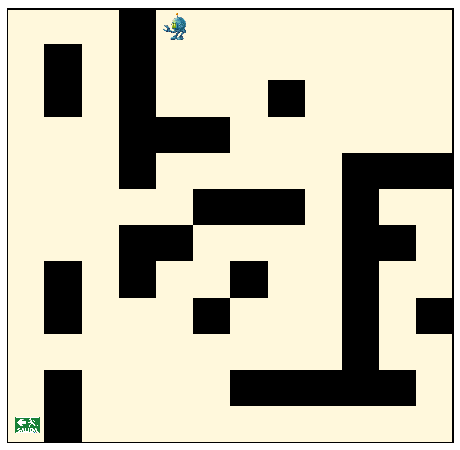

IndexError: pop from empty list

In [13]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

lab = Laberinto(pos_inicial=(11,11))
agente = Agente()
agente.reglas = reglas

for i in range(50):
    agente.perceptos = lab.para_sentidos()
    a = agente.reaccionar()
    lab.transicion(a)
    clear_output(wait=True)
    lab.pintar()
    plt.show()
    sleep(.25) 

El error `IndexError: pop from empty list` ocurre porque la lista de acciones es vacía, toda vez que el programa aún no está equipado para dar una decisión cuando hay un muro enfrente.

**Ejercicio 5:**

Extienda el programa de agente anterior para implementar las reglas condición-acción siguientes:

* Si el frente y el flanco derecho están bloqueados pero el flanco izquierdo no está bloqueado, voltear a la izquierda.
* Si el flanco derecho no está bloqueado, voltear a la derecha y avanzar una casilla.

Visualice el funcionamiento del agente desde la casilla $(11,11)$.

**Respuesta:**

Una implementación es la siguiente:

In [14]:
# perceptos[0]  =>  sensor forntal
# perceptos[1]  =>  sensor izquierdo
# perceptos[2]  =>  sensor derecho
# perceptos[3]  =>  sensor trasero
reglas = {
    # Si el frente no está bloqueado y el flanco derecho está
    # bloqueado, avanzar una casilla
    'not self.perceptos[0] and self.perceptos[2]': ['adelante'],
    # Si el frente y el flanco derecho están bloqueados y 
    # el flanco izquierdo no está bloqueado, voltear a la izquierda
    'self.perceptos[0] and self.perceptos[2] and not self.perceptos[1]': ['voltearIzquierda'],
    # Si el flanco derecho no está bloqueado, voltear a la derecha 
    # y avanzar una casilla
    'not self.perceptos[2]': ['voltearDerecha','adelante'],
}

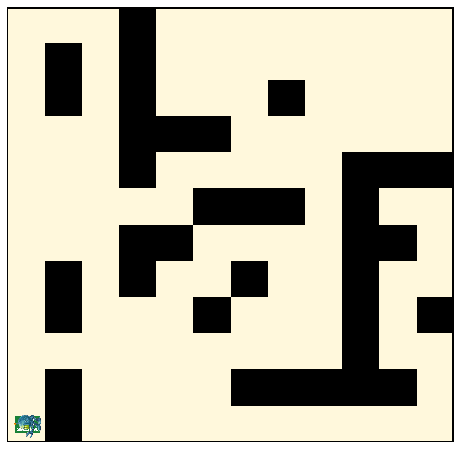

IndexError: pop from empty list

In [15]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

lab = Laberinto(pos_inicial=(11,11))
agente = Agente()
agente.reglas = reglas

for i in range(70):
    agente.perceptos = lab.para_sentidos()
    a = agente.reaccionar()
    lab.transicion(a)
    clear_output(wait=True)
    lab.pintar()
    plt.show()
    sleep(.25) 

---

**Ejercicio 6:**

Complete las reglas del agente para que siempre tome alguna dirección y no aparezca el error `pop from empty list`.

**Respuesta:**

In [29]:
# perceptos[0]  =>  sensor forntal
# perceptos[1]  =>  sensor izquierdo
# perceptos[2]  =>  sensor derecho
# perceptos[3]  =>  sensor trasero
reglas = {
    # Si el frente no está bloqueado y el flanco derecho está
    # bloqueado, avanzar una casilla
    'not self.perceptos[0] and self.perceptos[2]': ['adelante'],
    # Si el frente y el flanco derecho están bloqueados y 
    # el flanco izquierdo no está bloqueado, voltear a la izquierda
    'self.perceptos[0] and self.perceptos[2] and not self.perceptos[1]': ['voltearIzquierda'],
    # Si el flanco derecho no está bloqueado, voltear a la derecha 
    # y avanzar una casilla
    'not self.perceptos[2]': ['voltearDerecha','adelante'],
    # Si solo tiene libre el flanco trasero, dar media vuelta y adelante
    'self.perceptos[0] and self.perceptos[1] and self.perceptos[2] and not self.perceptos[3]':['voltearIzquierda', 'voltearIzquierda','adelante'],
    # Si no tiene ningún flanco libre, voltear izquierda
    'self.perceptos[0] and self.perceptos[1] and self.perceptos[2] and self.perceptos[3]':['voltearIzquierda'],
}

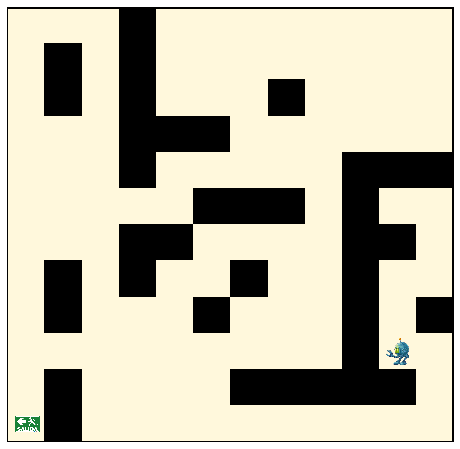

(10, 2)


In [18]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

lab = Laberinto(pos_inicial=(11,11))
agente = Agente()
agente.reglas = reglas

for i in range(70):
    agente.perceptos = lab.para_sentidos()
    a = agente.reaccionar()
    lab.transicion(a)
    clear_output(wait=True)
    lab.pintar()
    plt.show()
    sleep(.25) 

---

**Ejercicio 7:**

¿Cree usted que es posible implementar un agente de respuesta simple para encontrar una salida al comenzar en las casillas $(6,3)$ y $(7,3)$? Justifique su respuesta.

**Respuesta:**

Tal vez se podría implementar la solución con los recursos de un agente de respuesta simple, pero esta no es trivial. Resultaría más fácil resolver el problema del laberinto si fuera posible guardar la información de qué casillas se han visitado y cuáles no.

---

## Pruebas de desempeño <a class="anchor" id="pruebas"></a>

([Volver al inicio](#inicio))



**Ejercicio 8:**

Implemente la función `lab_aleatorio(p)` para generar un laberinto de $12\times 12$ de manera aleatoria, de tal manera que en cada casilla, excepto la salida $(0,0)$ y la inicial $(11,11)$, haya un muro con probabilidad `p` (con $0\leq p\leq 1$). 


**Respuesta:**

In [19]:
import numpy as np
from random import uniform

def lab_aleatorio(p=0.2, shape=(12,12)):
    lab = np.zeros(shape)
    casillas = [(x,y) for x in range(shape[0]) for y in range(shape[1])]
    for c in casillas:
        if uniform(0,1) < p:
            lab[c] = 1
    lab[0,0] = 0
    lab[11,11] = 0
    return lab

In [20]:
lab_aleatorio()

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

---

**Ejercicio 9:**

Determine el porcentaje de éxito del agente de respuesta simple en 100 laberintos aleatorios con $p=0.2$, iniciando en la casilla $(11,11)$, y una cantidad máxima de pasos igual a 200.

**Nota:**

El porcentaje de éxito debe estar cerca del 70%.

**Respuesta:**

In [26]:
def reaccionar(self):
    if len(self.acciones) == 0:
        self.programa()
    try:
        a = self.acciones.pop(0)
    except:
        raise Exception(self.perceptos)
    self.turno += 1
    return a
setattr(Agente, 'reaccionar', reaccionar)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 1.0)

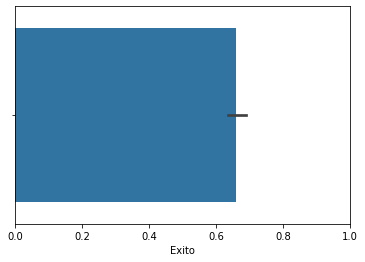

In [34]:
from agentes import *
import pandas as pd
import seaborn as sns

num_sim = 1000
max_iter = 200
resultados = []
for _ in range(num_sim):
    resultado = 0
    lab = Laberinto(pos_inicial=(11,11), laberinto=lab_aleatorio(p=0.2))
    agente = Agente()
    agente.reglas = reglas
    for __ in range(max_iter):
        agente.perceptos = lab.para_sentidos()
        a = agente.reaccionar()
        lab.transicion(a)
        if lab.agente == (0,0):
            resultado = 1
            break
    resultados.append(resultado)
data = pd.DataFrame({'Iteracion':list(range(num_sim)), 'Exito':resultados})            
ax = sns.barplot(data['Exito'])
ax.set_xlim([0,1])

---

**Ejercicio 10:**

Dibuje el porcentaje de éxito como una función de $p$ en las mismas condiciones del ejercicio pasado.

**Respuesta:**

In [48]:
from agentes import *
import pandas as pd
import seaborn as sns

num_sim = 1000
max_iter = 200
resultados = []
ps = []
iters = []
for p in [x/100 for x in range(0,100)]:
    for i in range(num_sim):
        resultado = 0
        lab = Laberinto(pos_inicial=(11,11), laberinto=lab_aleatorio(p=p))
        agente = Agente()
        agente.reglas = reglas
        for __ in range(max_iter):
            agente.perceptos = lab.para_sentidos()
            a = agente.reaccionar()
            lab.transicion(a)
            if lab.agente == (0,0):
                resultado = 1
                break
        ps.append(p)
        iters.append(i)
        resultados.append(resultado)
data = pd.DataFrame({'Prob':ps, 'Iteracion':iters, 'Exito':resultados})            

Text(0, 0.5, 'Probabilidad de éxito del agente')

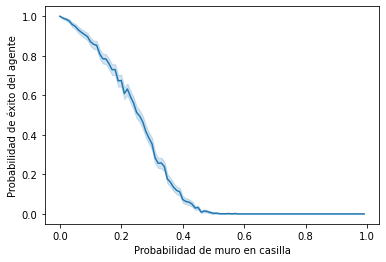

In [49]:
ax = sns.lineplot(x='Prob', y='Exito', data=data)
ax.set_xlabel('Probabilidad de muro en casilla')
ax.set_ylabel('Probabilidad de éxito del agente')

---

## En este notebook usted aprendió

* Los detalles de la implementación de un programa de agente dirigido por tablas y de reflejo simple.
* Realizar pruebas de desempeño a los programas.
